# What are the most demanded skills for the top 3 most popular data roles?

  ## Methodology

    1.Clean-up skill column
    2.Calculate skill count based on job_title_short
    3.Calculate skill percentage
    4.Plot final findings


In [36]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import seaborn as sns


# Load Data
df = pd.read_csv("C:\\Users\\ERKAN\\Downloads\\data_jobs.csv")

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [37]:
df_US = df[df.job_country == "United States"].copy()

In [38]:
df_skills = df_US.explode("job_skills")
df_skills[["job_title_short", "job_skills"]]

,job_title_short,job_skills
0,Senior Data Engineer,NaN
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,NaN
785705,Data Analyst,sql
785705,Data Analyst,python


In [39]:
df_skills_count = df_skills.groupby(["job_title_short", "job_skills"]).size()
df_skills_count

job_title_short    job_skills
Business Analyst   airflow        38
                   airtable        3
                   alteryx       264
                   angular        10
                   ansible         3
                                ... 
Software Engineer  wire            2
                   word          106
                   workfront       2
                   yarn            6
                   zoom           16
Length: 1870, dtype: int64

In [40]:
df_skills_count = df_skills_count.reset_index(name="skill_count")
df_skills_count

,job_title_short,job_skills,skill_count
0,Business Analyst,airflow,38
1,Business Analyst,airtable,3
2,Business Analyst,alteryx,264
3,Business Analyst,angular,10
4,Business Analyst,ansible,3
...,...,...,...
1865,Software Engineer,wire,2
1866,Software Engineer,word,106
1867,Software Engineer,workfront,2
1868,Software Engineer,yarn,6


In [41]:
df_skills_count.sort_values("skill_count", ascending=False, inplace=True)
df_skills_count

,job_title_short,job_skills,skill_count
886,Data Scientist,python,42379
472,Data Analyst,sql,34452
921,Data Scientist,sql,30034
351,Data Analyst,excel,27519
890,Data Scientist,r,26022
...,...,...,...
1313,Senior Data Engineer,asp.net core,1
228,Cloud Engineer,ms access,1
1020,Machine Learning Engineer,graphql,1
1582,Senior Data Scientist,mariadb,1


In [42]:
job_titles = df_skills_count.job_title_short.unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

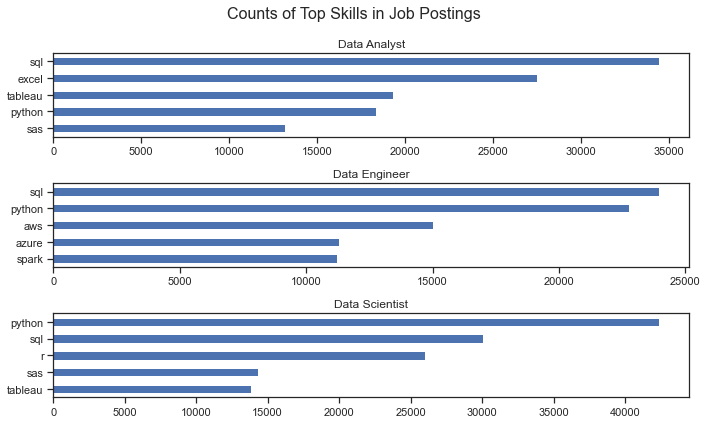

In [43]:
fig, ax = plt.subplots(len(job_titles), 1, figsize= (10,6))



for i, job_title in enumerate(job_titles):
    df_plotter = df_skills_count[df_skills_count.job_title_short == job_title].head()
    df_plotter.plot(kind="barh", x="job_skills", y="skill_count", ax=ax[i], title=job_title)
    
    ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)

fig.suptitle("Counts of Top Skills in Job Postings", fontsize=16)
fig.tight_layout()
plt.show()




In [44]:
df_US_counts = df_US.job_title_short.value_counts().reset_index(name="total_jobs")
df_US_counts.columns = ["job_title_short", "total_jobs"]
df_US_counts



,job_title_short,total_jobs
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [45]:
df_skill_percent = pd.merge(df_skills_count, df_US_counts, how="left", on="job_title_short")
df_skill_percent

,job_title_short,job_skills,skill_count,total_jobs
0,Data Scientist,python,42379,58830
1,Data Analyst,sql,34452,67816
2,Data Scientist,sql,30034,58830
3,Data Analyst,excel,27519,67816
4,Data Scientist,r,26022,58830
...,...,...,...,...
1865,Senior Data Engineer,asp.net core,1,9289
1866,Cloud Engineer,ms access,1,423
1867,Machine Learning Engineer,graphql,1,921
1868,Senior Data Scientist,mariadb,1,12946


In [46]:
df_skill_percent["skill_percent"] = 100 * (df_skill_percent.skill_count / df_skill_percent.total_jobs)
df_skill_percent

,job_title_short,job_skills,skill_count,total_jobs,skill_percent
0,Data Scientist,python,42379,58830,72.036376
1,Data Analyst,sql,34452,67816,50.802171
2,Data Scientist,sql,30034,58830,51.052184
3,Data Analyst,excel,27519,67816,40.578919
4,Data Scientist,r,26022,58830,44.232534
...,...,...,...,...,...
1865,Senior Data Engineer,asp.net core,1,9289,0.010765
1866,Cloud Engineer,ms access,1,423,0.236407
1867,Machine Learning Engineer,graphql,1,921,0.108578
1868,Senior Data Scientist,mariadb,1,12946,0.007724


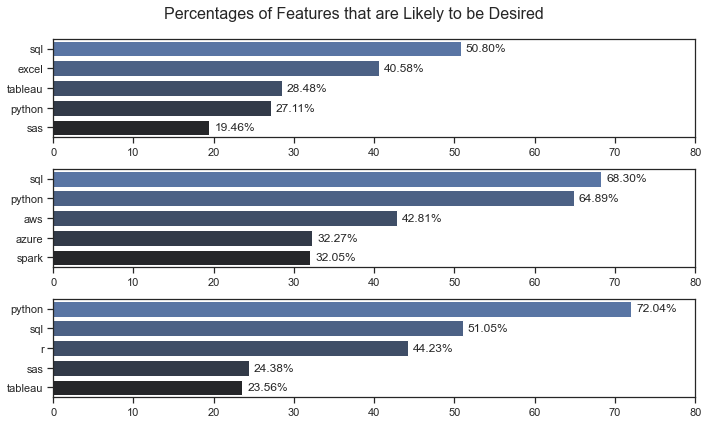

In [47]:
fig, ax = plt.subplots(len(job_titles), 1, figsize= (10,6))

sns.set_theme(style="ticks")

for i, job_title in enumerate(job_titles):
    df_plotter = df_skill_percent[df_skill_percent.job_title_short == job_title].head()
    bars = sns.barplot(data=df_plotter, y='job_skills', x='skill_percent', ax=ax[i], hue="skill_count", ci=None, dodge=False, palette="dark:b")
    
    #seaborn already inverted the yaxis
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,80)

    for container in bars.containers:
        bars.bar_label(container, fmt="%.2f%%", padding=5)

fig.suptitle("Percentages of Features that are Likely to be Desired", fontsize=16)
fig.tight_layout(h_pad=1)
plt.show()